<a href="https://colab.research.google.com/github/fertika-ds/Dimensionality-Reduction-PCA-t-SNE-/blob/main/Dimensionality_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fertika Indri Dhamaningrum - 24523160

Annisa Ramadhani - 24523018

# **Visualisasi Data Berdimensi Tinggi pada Handwritten Digits**

**Masalah yang dihadapi:**

sulitnya menganalisis kemiripan antar angka jika harus melihat 64 fitur piksel secara bersamaan.
Proyek ini bertujuan untuk mengeksplorasi dataset berdimensi tinggi (64 dimensi piksel) yang merepresentasikan angka tulisan tangan (0-9). Tantangannya adalah memvisualisasikan data ini ke dalam 2D untuk melihat apakah setiap angka membentuk cluster yang unik.

**Mengapa dimensionality reduction dibutuhkan?**

Untuk mengatasi hal tersebut, digunakan teknik reduksi dimensi seperti PCA dan t-SNE yang memproyeksikan data dari 64 dimensi ke dalam 2 dimensi. Dengan begitu, struktur data dan kecenderungan pengelompokan angka 0 hingga 9 dapat divisualisasikan dan dianalisis dengan lebih jelas.

In [16]:
# Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [17]:
# 1. LOAD DATASET

digits = load_digits()
# Melihat jumlah data dan fitur
print("Jumlah Sampel & Fitur:", digits.data.shape)

# Melihat daftar kelas/angka
print("Daftar Angka (Target):", digits.target_names)

# Melihat contoh isi fitur pertama (64 angka pertama)
print("Isi Fitur Sampel ke-0:\n", digits.data[0])
print("Label untuk sampel ke-0 adalah:", digits.target[0])

Jumlah Sampel & Fitur: (1797, 64)
Daftar Angka (Target): [0 1 2 3 4 5 6 7 8 9]
Isi Fitur Sampel ke-0:
 [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
Label untuk sampel ke-0 adalah: 0


**Sampel**


Setiap sampel adalah gambar 8 x 8 piksel yang sudah diratakan (flatten)
menjadi 64 fitur. Kita memisahkan antara X (data gambar) dan y (label angka 0-9) agar nantinya bisa memberi warna pada hasil visualisasi sesuai dengan angka aslinya.



In [18]:
# 2. PREPROCESSING (Standardisasi)
# Sangat penting untuk PCA agar skala data seragam
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**Preprocessing (Standardisasi)**

Standardisasi membuat "arena bermain" yang adil untuk semua 64 fitur sebelum diperas.

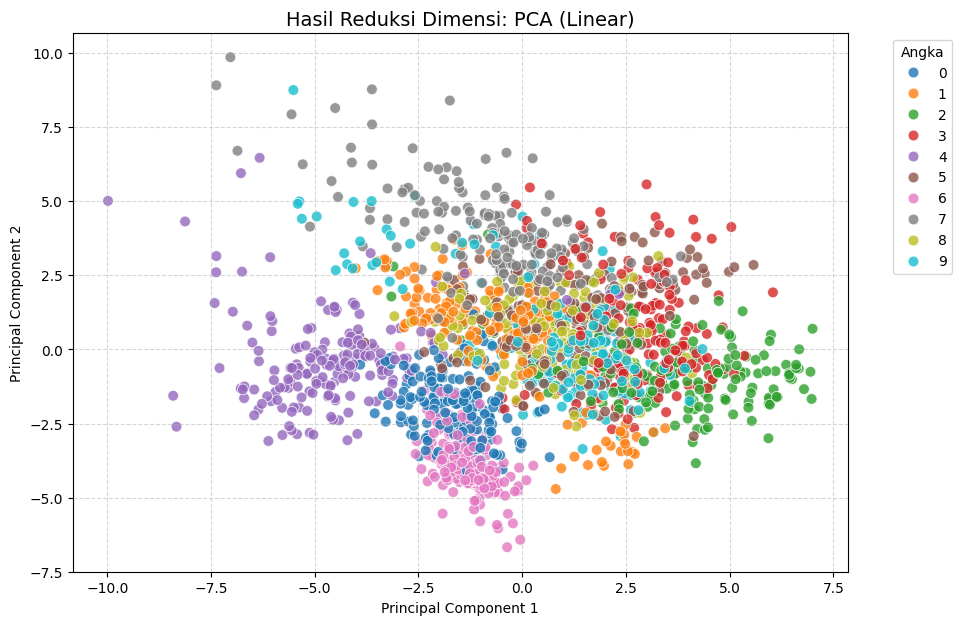

Informasi yang dipertahankan (Variance Ratio): 21.59%


In [19]:
# 3. PENERAPAN PCA (Principal Component Analysis)
# Reduksi ke 2 Komponen Utama
# Penerapan PCA ke 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualisasi PCA
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='tab10', s=60, alpha=0.8)
plt.title('Hasil Reduksi Dimensi: PCA (Linear)', fontsize=14)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Angka', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Penjelasan Makna Hasil
print(f"Informasi yang dipertahankan (Variance Ratio): {sum(pca.explained_variance_ratio_)*100:.2f}%")

**Penerapan PCA**

Mereduksi 64 fitur menjadi 2 Komponen Utama (PC1 & PC2) secara linear.

**Makna Hasil PCA:**

PCA mencoba menangkap varians (perbedaan) terbesar secara linear.

Hasilnya menunjukkan beberapa angka mulai terpisah (seperti angka 0 dan 4), namun banyak kelompok yang masih tumpang tindih (overlap) di tengah.

Ini berarti hubungan antar piksel angka terlalu kompleks untuk dijelaskan hanya dengan garis lurus (linear).

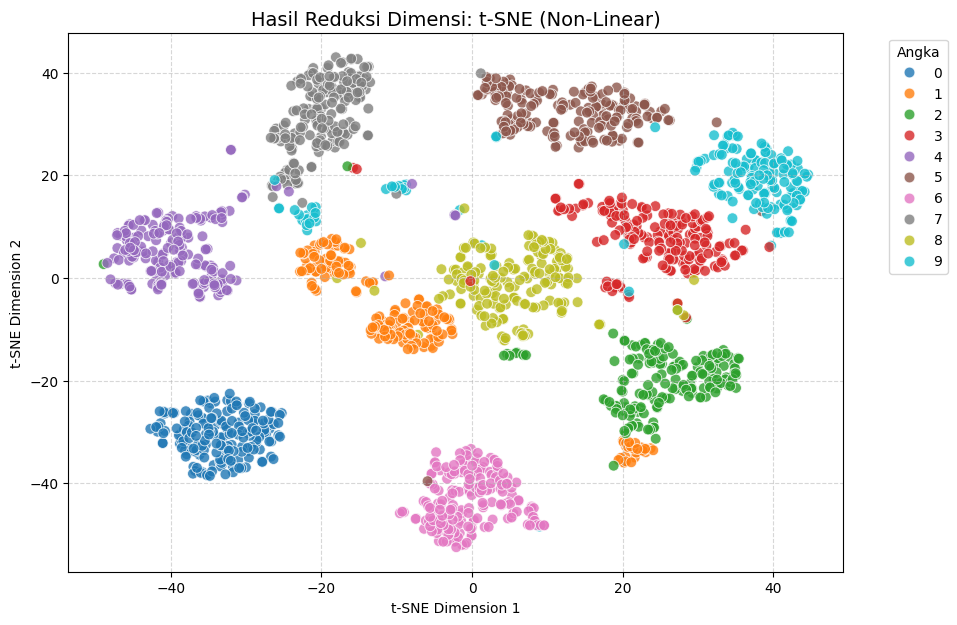

In [20]:
# 4. PENERAPAN t-SNE (t-Distributed Stochastic Neighbor Embedding)
# Reduksi ke 2 Dimensi
# Perplexity berhubungan dengan jumlah tetangga terdekat (biasanya 5-50)

tsne = TSNE(n_components=2, perplexity=30, random_state=42, max_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)

# Visualisasi t-SNE
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y, palette='tab10', s=60, alpha=0.8)
plt.title('Hasil Reduksi Dimensi: t-SNE (Non-Linear)', fontsize=14)
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend(title='Angka', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

**Penerapan t-SNE**

Mentransformasikan data 64D ke 2D menggunakan pendekatan probabilitas tetangga terdekat.

**Makna Pola/Cluster t-SNE:**

Cluster yang Terbentuk: t-SNE berhasil membentuk "pulau-pulau" yang sangat jelas. Setiap warna (angka) berkumpul di areanya masing-masing dengan jarak antar kelompok yang cukup jauh.

Pola Lokal: Karena t-SNE bersifat non-linear, ia sangat jago menjaga agar data yang mirip di 64D tetap berdekatan di 2D.

Kesimpulan: t-SNE jauh lebih efektif daripada PCA untuk memvisualisasikan kemiripan angka tulisan tangan karena mampu menangkap struktur hubungan piksel yang rumit.

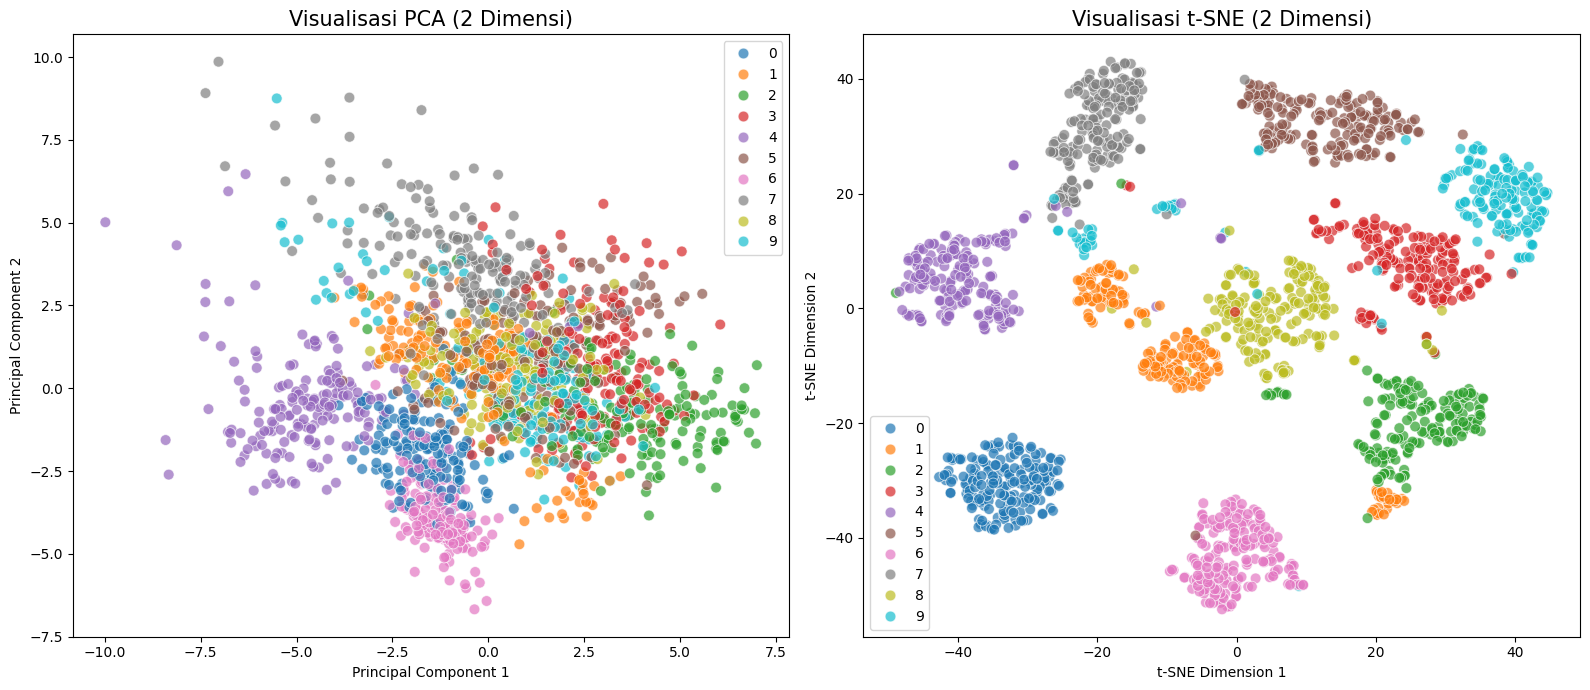

In [21]:
# 5. VISUALISASI (Membandingkan PCA dan t-SNE)
fig, ax = plt.subplots(1, 2, figsize=(16, 7))

# Plot PCA
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='tab10', s=60, alpha=0.7, ax=ax[0], legend='full')
ax[0].set_title('Visualisasi PCA (2 Dimensi)', fontsize=15)
ax[0].set_xlabel('Principal Component 1')
ax[0].set_ylabel('Principal Component 2')

# Plot t-SNE
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y, palette='tab10', s=60, alpha=0.7, ax=ax[1], legend='full')
ax[1].set_title('Visualisasi t-SNE (2 Dimensi)', fontsize=15)
ax[1].set_xlabel('t-SNE Dimension 1')
ax[1].set_ylabel('t-SNE Dimension 2')

plt.tight_layout()
plt.show()

**Hasil Analisis**

**1. Perbedaan hasil PCA dan t-SNE**

a. Sifat dan Pendekatan Algoritma


*   PCA bekerja secara linear dengan memfokuskan pencarian pada arah atau sumbu yang memiliki varians (perbedaan data) terbesar secara global.
*   t-SNE bekerja secara non-linear dengan menghitung probabilitas kemiripan antar tetangga terdekat, sehingga lebih berfokus pada struktur data secara lokal.

b. Hasil Bentuk Visualisasi

*   Pada PCA, data angka cenderung menumpuk di area tengah. Kelompok data (cluster) tidak terpisah secara sempurna karena metode ini hanya berusaha meratakan data pada bidang datar.
*   Pada t-SNE, terbentuk "pulau-pulau" data yang sangat jelas. Setiap angka (0-9) terpisah jauh dari kelompok angka lainnya, menciptakan batas yang tegas.

c. Informasi yang Dijaga

*   PCA berupaya menjaga struktur global, artinya ia memastikan titik-titik yang jaraknya berjauhan di dimensi asli (64D) tetap terlihat jauh di hasil proyeksi (2D).
*   t-SNE lebih mengutamakan struktur lokal, memastikan sampel angka yang memiliki kemiripan di dimensi 64 tetap berada berdekatan saat diturunkan ke dimensi 2.

d. Efisiensi Komputasi

*   PCA jauh lebih unggul dalam hal kecepatan. Prosesnya sangat singkat bahkan jika digunakan pada dataset yang sangat besar.
*   t-SNE membutuhkan waktu komputasi yang lebih lama karena cara kerjanya bersifat iteratif (dilakukan berulang-ulang hingga mencapai hasil optimal).

**2. Metode mana yang lebih sesuai untuk kasus tersebut dan alasannya**

Untuk kasus Visualisasi Dataset Handwritten Digits, metode yang jauh lebih sesuai adalah t-SNE.

Alasannya:

- Pemisahan Cluster yang Jelas: Dataset angka tulisan tangan memiliki hubungan antar piksel yang kompleks dan non-linear. t-SNE mampu menangkap pola lengkungan dan bentuk unik setiap angka sehingga cluster 0 hingga 9 terlihat terpisah secara signifikan tanpa banyak overlap.

- Deteksi Kemiripan (Local Structure): t-SNE sangat handal dalam memastikan bahwa variasi tulisan tangan untuk angka yang sama (misal: angka '1' yang tegak vs '1' yang miring) tetap berada dalam satu kelompok yang berdekatan.

- Tujuan Visualisasi: Karena tujuan proyek adalah untuk "melihat apakah setiap angka membentuk cluster yang unik", t-SNE memberikan representasi visual yang jauh lebih intuitif dan mudah diinterpretasikan oleh mata manusia dibandingkan PCA yang masih menyisakan banyak tumpang tindih antar kelas.